In [1]:
import numpy as np

Here,
y = salary,
x = years of experience.
We need to see the relationship between these 2 and how years of exp affects salary

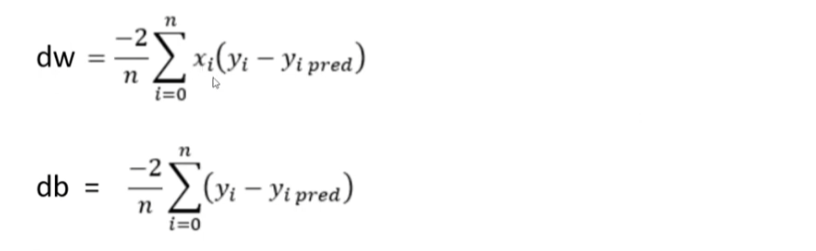

#Linear Regression

In [2]:
class Linear_Regression():

  #parameter initiation (learn rate and iter no.)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):
    #Number of training examples & number of features
    self.m, self.n = X.shape #number of rows (m) & cols (n)

    #initiating the weights and bias
    self.w = np.zeros(self.n) #many value for weight for each feature X
    self.b = 0 #only one value for bias
    self.X = X
    self.Y = Y

    #Implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self, ):
    Y_prediction = self.predict(self.X) #predict is not created yet. it is below

    #calculate gradient
    dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = -2 * np.sum(self.Y - Y_prediction) / self.m

    #updating weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self, X):
    return X.dot(self.w) + self.b






A class is to create a template. We can include many functions within this class

"self" needs to be included with every function. Suppose we import LR from sklearn. We take one instance and load it to a variable say "model". THis instance is what "self".

"learning_rate" is what determines the steps to reach minima. It + "no_of_iterations" = hyperparameters




In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"D:\Projects\lin-reg-from-scratch\salary_data.csv")

In [5]:
df.shape

(30, 2)

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
X = df.drop(["Salary"], axis=1)
y = df["Salary"]
print(X.shape, y.shape)
print(type(X), type(y))

(30, 1) (30,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [8]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [9]:
print(y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [11]:
model = Linear_Regression(learning_rate= 0.02, no_of_iterations=1000)
model.fit(X_train, y_train) #this is the imp learning step. It finds loss, updates weights, repeat


In [12]:
#print the weights and bias

print("Weight = ", model.w[0])
print("Bias = ", model.b)

Weight =  9534.934692142133
Bias =  23735.97251425514


C:\Users\haris\AppData\Local\Temp\ipykernel_14392\1134571809.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Weight = ", model.w[0])


y = 9534(x) + 23735

ie. salary = 9534(experience) + 23735

In [13]:
#Model Testing

test_predict = model.predict(X_test)
print(test_predict)

1      36131.387614
0      34224.400676
14     66643.178629
9      59015.230875
21     91434.008828
19     80945.580667
23    101922.436990
6      52340.776591
3      42805.841899
dtype: float64


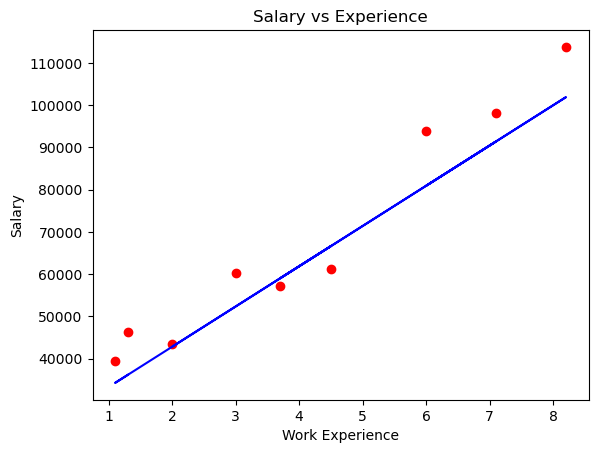

In [14]:
#Visualizing predicted and actual values

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, test_predict, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title("Salary vs Experience")
plt.show()

So its clear that we have good generalization, which is good. Blue line is the generalised test_predcit y and red dots are actual y.